In [1]:
#Import required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#import the 2017 and 2022 surveys and ensure they are imported correcctly
df2017= pd.read_csv("./survey_results_public2017.csv")
df2017.head()
df2022= pd.read_csv("./survey_results_public2022.csv")
df2022.head()

,ResponseId,MainBranch,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,...,TimeSearching,TimeAnswering,Onboarding,ProfessionalTech,TrueFalse_1,TrueFalse_2,TrueFalse_3,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,None of these,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,"Employed, full-time",Fully remote,Hobby;Contribute to open-source projects,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Difficult,NaN
2,3,"I am not primarily a developer, but I write co...","Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Friend or family member...,Technical documentation;Blogs;Programming Game...,NaN,14,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,40205.0
3,4,I am a developer by profession,"Employed, full-time",Fully remote,I don’t code outside of work,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Books / Physical media;School (i.e., Universit...",NaN,NaN,20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,215232.0
4,5,I am a developer by profession,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Stack Overflow;O...,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN


0.373221829468
0.040926064227


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


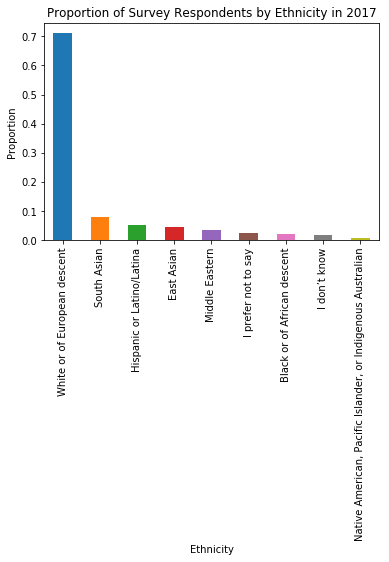

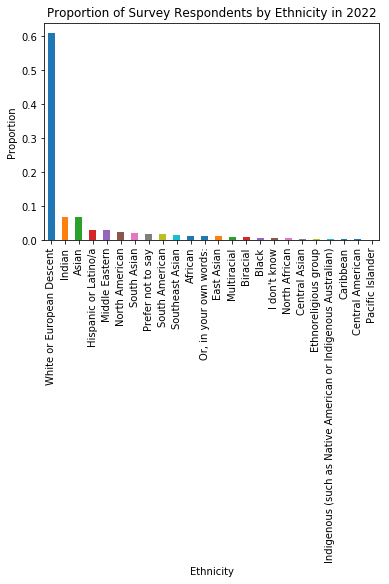

                                                           0
White or of European descent                        0.710913
South Asian                                         0.081137
Hispanic or Latino/Latina                           0.053011
East Asian                                          0.046888
Middle Eastern                                      0.034478
I prefer not to say                                 0.025048
Black or of African descent                         0.022298
I don’t know                                        0.018369
Native American, Pacific Islander, or Indigenou...  0.007858
                                                           0
White or European Descent                           0.609136
Indian                                              0.068031
Asian                                               0.068031
Hispanic or Latino/a                                0.030814
Middle Eastern                                      0.029156
North American          

In [2]:
#1a. Split the datasets into ethnicity and gender demogrpahics and plot their splits in
#2017 and 2022
print(df2017["Race"].isna().mean())#around 37%
print(df2022["Ethnicity"].isna().mean())#around 4%
race2017= df2017.dropna(subset= ["Race"])
race2022= df2022.dropna(subset= ["Ethnicity"])
#remove na's from dataset - can only include data which gave a response and not an oveewehelming amount
race2022["Race"]=df2022["Ethnicity"]# ensured that the function could use both 2017 and 2022 dataset

def split_plot(df, title, plot=True):
    '''
    INPUT 
        df - a dataframe 
        title -  title of your plot
        plot - bool for plot or no plot
        
    OUTPUT
        props_df - a dataframe with the proportion of individuals in each category
        Displays a plot of split in ethnicity/race column.
    '''
    ###Below section splits the multiple responses which can be given by one person for race and counts their ividiviual appearances
    answers_series = df['Race'].str.split(';').apply(lambda x: [i.strip() for i in x]).apply(pd.Series).stack()
    replace_dict = {'White': 'White or European Descent', 'European': 'White or European Descent'}
    answers_series= answers_series.replace(replace_dict)
    answer_counts = answers_series.value_counts()
    
    #plots a bar chart using the counts of each individual response and their proportions of the whole
    if plot:
        (answer_counts/answer_counts.sum()).plot(kind='bar', legend=None);
        plt.title(title)
        plt.xlabel("Ethnicity")
        plt.ylabel("Proportion");
        plt.show()
    #output these proportions as a dataframe 
    props_study= answer_counts/answer_counts.sum()
    props_df=props_study.to_frame()
    return props_df
    
props_df2017 = split_plot(race2017,"Proportion of Survey Respondents by Ethnicity in 2017")#find split in 2017
props_df2022 = split_plot(race2022,"Proportion of Survey Respondents by Ethnicity in 2022")#find split in 2022
print(props_df2017)
print(props_df2022)



0.334231399259
0.0215832710978


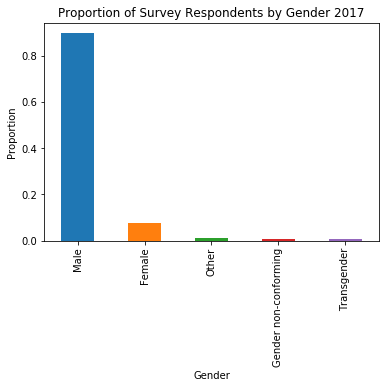

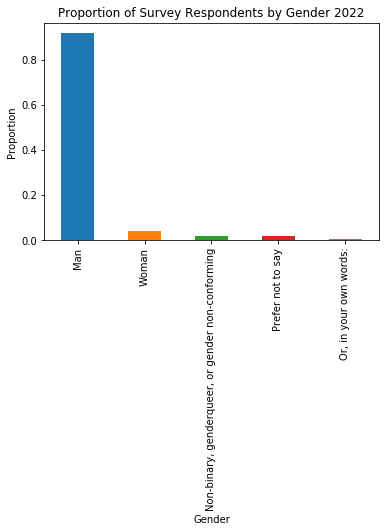

                              0
Male                   0.899173
Female                 0.076930
Other                  0.010862
Gender non-conforming  0.008179
Transgender            0.004856
                                                          0
Man                                                0.916635
Woman                                              0.039795
Non-binary, genderqueer, or gender non-conforming  0.018802
Prefer not to say                                  0.018500
Or, in your own words:                             0.006267


In [3]:
#1b. Do the same as above but for gender
print(df2017["Gender"].isna().mean())#around 33%
print(df2022["Gender"].isna().mean())#around 2%

gender2017= df2017.dropna(subset= ["Gender"])
gender2022= df2022.dropna(subset= ["Gender"])

def split_plot_2(df, title, plot=True):
    '''
    This function achieves same goal as previous section for ethnicity
    INPUT 
        df - a dataframe
        title - title of plot
        plot - bool for plot or not
        
    OUTPUT
        props_df - a dataframe with the proportion of  individuals
        Displays a plot of these proportions.
    '''
    answers_series = df['Gender'].str.split(';').apply(lambda x: [i.strip() for i in x]).apply(pd.Series).stack()
    
    answer_counts = answers_series.value_counts()
   
    
    if plot:
        (answer_counts/answer_counts.sum()).plot(kind='bar', legend=None);
        plt.title(title)
        plt.xlabel("Gender")
        plt.ylabel("Proportion");
        plt.show()
    props_study = answer_counts/answer_counts.sum()
    props_df=props_study.to_frame()
    return props_df

gendersplit2017= split_plot_2(gender2017,"Proportion of Survey Respondents by Gender 2017")#find gender split for 2017
gendersplit2022= split_plot_2(gender2022,"Proportion of Survey Respondents by Gender 2022")#find gender split for 2022
print(gendersplit2017)
print(gendersplit2022)

In [4]:
print(df2022["CompFreq"].value_counts())

Yearly     4628
Monthly    3747
Weekly      205
Name: CompFreq, dtype: int64


In [5]:
#2. Find if the representation is different for those in the highest wages

#subsetting the 2017 dataset so only top 20% of earners are included#############
threshold= df2017["Salary"].quantile(0.8)
topearner2017= df2017[df2017['Salary'] >= threshold]
topearnergender2017= topearner2017.dropna(subset=["Gender"])
topearnergendersplit2017= split_plot_2(topearnergender2017, title = "n/a" , plot= False)#split this by gender 

#####plot the difference between the representation amongst top earners and all respondents
comp_gender_earn_2017 = pd.merge(topearnergendersplit2017, gendersplit2017, left_index=True, right_index=True)
comp_gender_earn_2017.columns = ['TopEarners', 'All']
comp_gender_earn_2017['Difference'] = comp_gender_earn_2017['TopEarners'] - comp_gender_earn_2017['All']
comp_gender_earn_2017.style.bar(subset=['Difference'], align='mid', color=['#d65f5f', '#5fba7d'])




,TopEarners,All,Difference
Male,0.892453,0.899173,-0.00671972
Female,0.0778302,0.0769304,0.000899739
Other,0.0117925,0.0108623,0.00093018
Gender non-conforming,0.00990566,0.00817865,0.00172701
Transgender,0.00801887,0.00485607,0.00316279


In [6]:
#2b. Do the same for race that we did for gender above

topearnerrace2017= topearner2017.dropna(subset=["Race"])
topearnerracesplit2017= split_plot(topearnerrace2017, title= "N/A", plot= False)
comp_race_earn_2017 = pd.merge(topearnerracesplit2017, props_df2017, left_index=True, right_index=True)
comp_race_earn_2017.columns = ['TopEarners', 'All']
comp_race_earn_2017['Difference'] = comp_race_earn_2017['TopEarners'] - comp_race_earn_2017['All']
comp_race_earn_2017.style.bar(subset=['Difference'], align='mid', color=['#d65f5f', '#5fba7d'])



,TopEarners,All,Difference
White or of European descent,0.808383,0.710913,0.09747
Hispanic or Latino/Latina,0.0409949,0.0530107,-0.0120158
East Asian,0.03731,0.0468878,-0.00957779
South Asian,0.0345463,0.0811368,-0.0465905
Black or of African descent,0.0198065,0.0222979,-0.00249135
"Native American, Pacific Islander, or Indigenous Australian",0.0193459,0.00785829,0.0114876
I prefer not to say,0.0179641,0.0250483,-0.00708422
Middle Eastern,0.0165822,0.0344782,-0.017896
I don’t know,0.00506679,0.0183688,-0.013302


In [7]:
#3. Is there a glass ceiling effect?
#subset the data by gender
df_2017_female= df2017[df2017["Gender"]=="Female"]
df_2017_male= df2017[df2017["Gender"]=="Male"]

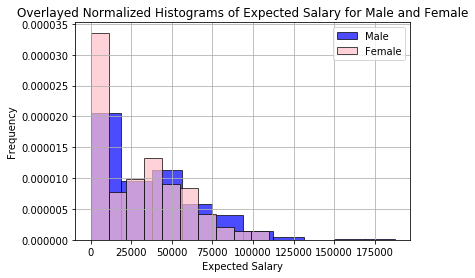

In [10]:
#Create overlayed normalised histograms of the two gender and their expected salary
df_2017_male['ExpectedSalary'].hist(bins=10, density= True, color='blue', edgecolor='black', alpha=0.7, label='Male')
df_2017_female['ExpectedSalary'].hist(bins=10, density= True, color='pink', edgecolor='black', alpha=0.7, label='Female')

# Add labels and title
plt.xlabel("Expected Salary")
plt.ylabel('Frequency')
plt.title('Overlayed Normalized Histograms of Expected Salary for Male and Female')
plt.legend()

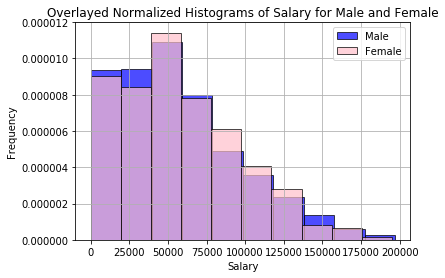

In [8]:
#Do the same for actual Salary
df_2017_male['Salary'].hist(bins=10, density= True, color='blue', edgecolor='black', alpha=0.7, label='Male')
df_2017_female['Salary'].hist(bins=10, density= True, color='pink', edgecolor='black', alpha=0.7, label='Female')

# Add labels and title
plt.xlabel("Salary")
plt.ylabel('Frequency')
plt.title('Overlayed Normalized Histograms of Salary for Male and Female')
plt.legend()

In [9]:
#produce desciptive analytics of the two
print(df_2017_male["ExpectedSalary"].describe())
print(df_2017_female["ExpectedSalary"].describe())

count      1643.000000
mean      34167.379784
std       30054.245056
min           0.000000
25%        5728.837458
50%       31250.000000
75%       53030.303030
max      187500.000000
Name: ExpectedSalary, dtype: float64
count       130.000000
mean      30014.887873
std       27302.846553
min           0.044046
25%        3056.451613
50%       28432.131846
75%       49596.774194
max      110000.000000
Name: ExpectedSalary, dtype: float64
